<a href="https://colab.research.google.com/github/violet417/violet417/blob/main/2MD%EA%B8%B0%EC%B4%88_09_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 선형 회귀
- 종속변수 y와 한 개 이상의 독립변수 x와의 선형 상관관계를 모델링하는 회귀분석
- 머신러닝의 목적은 실제 데이터를 바탕으로 모델을 생성해서, 다른 입력값을 넣었을 때, 발생할 아웃풋을 예측하는 데 있음. 
- 여러개의 특성을 가지고 어떤 선을 그리는 것
- 데이터를 놓고, 그것을 가장 잘 설명할 수 있는 선을 찾는 분석법이 선형 회귀이다. 

#### 어떤 직선이 가장 좋을까?
- 실제 값과 직선 사이의 오차들의 합이 가장 작은 선이 제일 좋은 선. 
- 오차(error): 관측값(실제값)과 예측값 사이의 차이

#### 단순 선형 회귀와 다중 선형 회귀
- 단순 선형회귀는 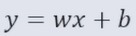로 표현할 수 있으며,  (독립변수 1개)  
다중 선형 회귀는 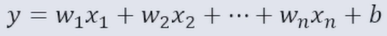로 표현할 수 있다. (독립변수 2개 이상)

#### 선형 회귀 모델
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  
lr.fit(문제집, 정답지)  
기울기: lr.coef_  
절편: lr.intercept_  

In [ ]:
import pandas as pd

perch = pd.read_csv('perch.csv')
# data의 길이를 가지고 무게를 예측
data = perch['length'].to_numpy()   # to_numpy()로 행렬로 바꿔줌
target = perch['weight'].to_numpy()

In [ ]:
data2 = data.reshape(-1, 1)  # 문제집은 2차원 이어야 하는데 1치원으로 되어 있음. 
                            # 자동행, 1열로 모양 바꿔줌.

In [ ]:
from sklearn.model_selection import train_test_split  
# 데이터 분할
# 훈련 문제집, 시험 문제집, 훈련 정답지, 시험 정답지
train_input, test_input, train_target, test_target = train_test_split(data2, target)

In [ ]:
lr = LinearRegression()
# 학습할 때는 훈련 문제집과 훈련 정답지로 훈련 / K 최근접 이웃 회귀 모델: 97%
lr.fit(train_input, train_target) 
# 평가는 시험 문제집, 시험 정답지로 함.
lr.score(test_input, test_target)   # 회귀에서의 평가는 r^2(r 스퀘어 값)으로 확인
                                    # r^2: 분산을 표준편차로 나눔. 얼마나 퍼져있는가를 확인
                                    # 실제값과 예측값이 퍼져있는 것이 비슷하다면 r^2 값이 1이 됨

0.926733673177107

In [ ]:
lr.coef_    # 기울기

array([35.09626046])

In [ ]:
lr.intercept_    # 절편

-595.3770301471754

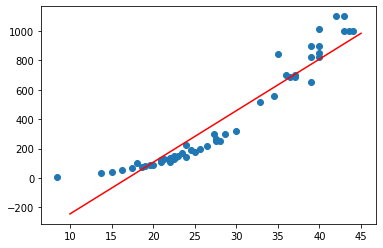

In [ ]:
# 길이 데이터가 하나만 있으므로 표준화할 필요 x
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.scatter(perch['length'], perch['weight'])
# 아래 기울기와 절편을 이용하여 선 그려보기
# x축은 10~45까지, y축은 기울기 * x(10~45) + 절편, 색상은 red
plt.plot(range(10, 46), lr.coef_ * range(10,46) + lr.intercept_, 'red') # 기울기 * x + 절편

In [ ]:
perch2 = pd.read_csv('perch2.csv').to_numpy() # 바로 2차원 행렬로 가져옴
perch2

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [ ]:
# 특성이 3개가 있기 때문에 데이터 표준화 필요!

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(perch2, target)

In [ ]:
import numpy as np

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

lr = LinearRegression()
lr.fit(train_scaled, train_target)
lr.score(test_scaled, test_target)

0.9213356264726111

In [ ]:
lr.coef_

array([ 61.54580606, 175.23412226,  98.36315407])

In [ ]:
lr.intercept_

375.58333333333337